

# Project: Investigate a Dataset No-show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


>The dataset I have chosen is **No-show Appointment**.



>This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. 

###### **The questions that are trying to answer for this dataset are:**

>1- **Which one is more care about their health and show up for their appointments men or women?**

>2- **Working days or weekends where appointments are frequently no-shows?**

>3- **Is SMS notifacation has impact to make the patient show up for their appiontment?**

>4- **what is the factor from these features ( age , being Hypertension, being Diabetes, being Alcoholic) that has most effect of people to show up their appointment?**



In [1]:
# import all the packages that were used to invistgete


import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

>  I will load  the data, check for cleanliness, and then trim and clean the dataset for analysis. 
### General Properties

In [2]:
#load the data and inspect it
df= pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
#To know how many rows and column are in the dataset
df.shape

(110527, 14)

## Rename columns


In [4]:
#  lowercase labels to make work with the data more easier 
df.rename(columns=lambda x: x.lower(), inplace=True)
# to deal easier qith no-show column I replaced the - with _
df.rename(index=str, columns={"no-show": "no_show"}, inplace=True)

# confirm changes
df.head(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


## checking the data types of columns

In [5]:
df.dtypes

patientid         float64
appointmentid       int64
gender             object
scheduledday       object
appointmentday     object
age                 int64
neighbourhood      object
scholarship         int64
hipertension        int64
diabetes            int64
alcoholism          int64
handcap             int64
sms_received        int64
no_show            object
dtype: object

#### We noticed that we need to change the data types of (PatientId ,scheduledDay , AppointmentDay ) to make working with the dataset more easier.

In [6]:
#change the data type of patient id to int to remove + notation

df.patientid=df.patientid.astype(int)

In [7]:
#change the data type of scheduledDay , AppointmentDay to date format

df['scheduledday'] = pd.to_datetime(df['scheduledday'])
df['appointmentday'] = pd.to_datetime(df['appointmentday'])

In [8]:
#confirm changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patientid         110527 non-null int64
appointmentid     110527 non-null int64
gender            110527 non-null object
scheduledday      110527 non-null datetime64[ns]
appointmentday    110527 non-null datetime64[ns]
age               110527 non-null int64
neighbourhood     110527 non-null object
scholarship       110527 non-null int64
hipertension      110527 non-null int64
diabetes          110527 non-null int64
alcoholism        110527 non-null int64
handcap           110527 non-null int64
sms_received      110527 non-null int64
no_show           110527 non-null object
dtypes: datetime64[ns](2), int64(9), object(3)
memory usage: 12.6+ MB


## checking for nulls rows

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patientid         110527 non-null int64
appointmentid     110527 non-null int64
gender            110527 non-null object
scheduledday      110527 non-null datetime64[ns]
appointmentday    110527 non-null datetime64[ns]
age               110527 non-null int64
neighbourhood     110527 non-null object
scholarship       110527 non-null int64
hipertension      110527 non-null int64
diabetes          110527 non-null int64
alcoholism        110527 non-null int64
handcap           110527 non-null int64
sms_received      110527 non-null int64
no_show           110527 non-null object
dtypes: datetime64[ns](2), int64(9), object(3)
memory usage: 12.6+ MB


##### We noticed that all colums have 110527 values and the dataset has 110527 entries so there is no missing values.

## checking for duplicates

In [10]:
sum(df.duplicated())

0

##### There is no duplicste rows in the dataset.

## checking for outliers

In [11]:
#check if the age column has a value out of range
df.query('age <0')

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
99832,465943158731293,5775010,F,2016-06-06 08:58:13,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No


In [12]:
#replace it the value with mean
df.age.replace(-1,df.age.mean(),inplace=True)

#confirm change
df.query('age <0')

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show


# Data is cleaning now!

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 -  Which one is more care about their health and show up for their appointments? men or women?

In [13]:
#first I want to count the number of men and women
Show_gen=df.groupby(['gender','no_show'])['no_show'].count()
Show_gen

gender  no_show
F       No         57246
        Yes        14594
M       No         30962
        Yes         7725
Name: no_show, dtype: int64

#### Making a bar chart to count number of who showed up and who is not

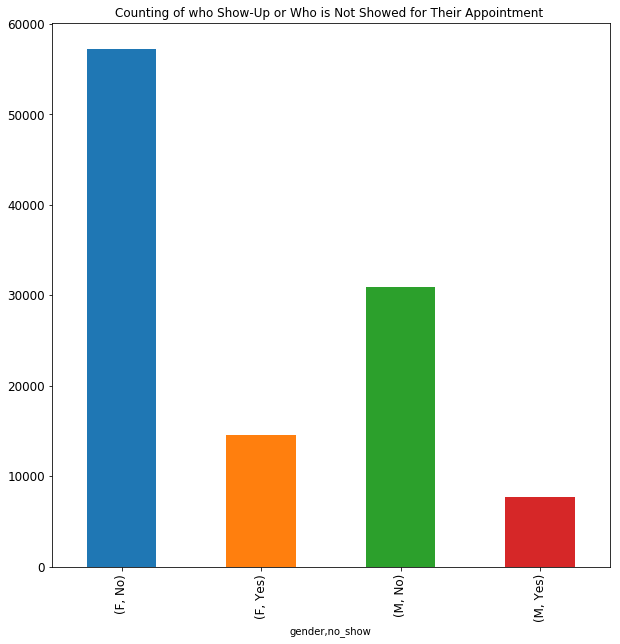

In [14]:
Show_gen.plot.bar(figsize=(10,10), fontsize = 12, title="Counting of who Show-Up or Who is Not Showed for Their Appointment ");


#### we noticed that many women they show up for their appointments coompared to men.

### Research Question 2 -  Working days or weekends where appointments are frequently no-shows?

In [15]:
#converting date to day and save it in new column to make comparison easier
df['app_day']= df['appointmentday'].dt.weekday_name

#confirm changes
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,app_day
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62.0,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56.0,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62.0,MATA DA PRAIA,0,0,0,0,0,0,No,Friday
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29,8.0,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29,56.0,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday


In [16]:
#I want to save the patients who are no show up their app.
no_show_df= df.query('no_show == "Yes"')
no_show_df

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,app_day
6,733688164476661,5630279,F,2016-04-27 15:05:12,2016-04-29,23.0,GOIABEIRAS,0,0,0,0,0,0,Yes,Friday
7,3449833394123,5630575,F,2016-04-27 15:39:58,2016-04-29,39.0,GOIABEIRAS,0,0,0,0,0,0,Yes,Friday
11,7542951368435,5620163,M,2016-04-26 08:44:12,2016-04-29,29.0,NOVA PALESTINA,0,0,0,0,0,1,Yes,Friday
17,14794966191172,5633460,F,2016-04-28 09:28:57,2016-04-29,40.0,CONQUISTA,1,0,0,0,0,0,Yes,Friday
20,622257462899397,5626083,F,2016-04-27 07:51:14,2016-04-29,30.0,NOVA PALESTINA,0,0,0,0,0,0,Yes,Friday
21,12154843752835,5628338,F,2016-04-27 10:50:45,2016-04-29,4.0,CONQUISTA,0,0,0,0,0,0,Yes,Friday
22,863229818887631,5616091,M,2016-04-25 13:29:16,2016-04-29,13.0,CONQUISTA,0,0,0,0,0,1,Yes,Friday
31,311284853849,5628907,M,2016-04-27 12:07:14,2016-04-29,12.0,NOVA PALESTINA,1,0,0,0,0,0,Yes,Friday
44,274164858852,5635414,F,2016-04-28 13:27:27,2016-04-29,78.0,SÃO CRISTÓVÃO,0,1,1,0,0,0,Yes,Friday
48,8545415176986,5618643,F,2016-04-26 07:19:49,2016-04-29,58.0,SÃO CRISTÓVÃO,0,0,0,0,0,1,Yes,Friday


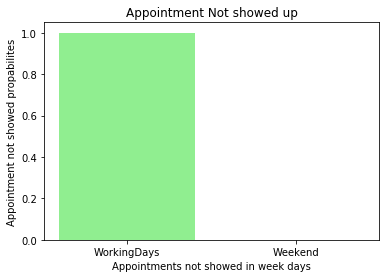

In [17]:
#plotting 
workingdays=no_show_df.query('app_day != "Saturday" | app_day != "Sunday"')
weekend= no_show_df.query('app_day == "Saturday" | app_day == "Sunday"')
prop_days=workingdays.shape[0]/no_show_df.shape[0]
prop_end=weekend.shape[0]/no_show_df.shape[0]
plt.bar([1,2], [prop_days,prop_end], tick_label=['WorkingDays','Weekend'], color=['lightgreen','aquamarine'])
plt.title('Appointment Not showed up')
plt.xlabel('Appointments not showed in week days')
plt.ylabel('Appointment not showed propabilites');

#### We noticed that appointments that have been scheduled in the working days are likely not to be showen up.

### Research Question 3 -  Is SMS notifacation has impact to make the patient show up for their appiontment?

In [18]:
#I want to save the patients who are show up for their app.
show_df= df.query('no_show == "No"')
show_df

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,app_day
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62.0,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56.0,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62.0,MATA DA PRAIA,0,0,0,0,0,0,No,Friday
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29,8.0,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29,56.0,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday
5,95985133231274,5626772,F,2016-04-27 08:36:51,2016-04-29,76.0,REPÚBLICA,0,1,0,0,0,0,No,Friday
8,56394729949972,5638447,F,2016-04-29 08:02:16,2016-04-29,21.0,ANDORINHAS,0,0,0,0,0,0,No,Friday
9,78124564369297,5629123,F,2016-04-27 12:48:25,2016-04-29,19.0,CONQUISTA,0,0,0,0,0,0,No,Friday
10,734536231958495,5630213,F,2016-04-27 14:58:11,2016-04-29,30.0,NOVA PALESTINA,0,0,0,0,0,0,No,Friday
12,566654781423437,5634718,F,2016-04-28 11:33:51,2016-04-29,22.0,NOVA PALESTINA,1,0,0,0,0,0,No,Friday


In [19]:
new_df= show_df.groupby('sms_received')['no_show'].count()
new_df

sms_received
0    62510
1    25698
Name: no_show, dtype: int64

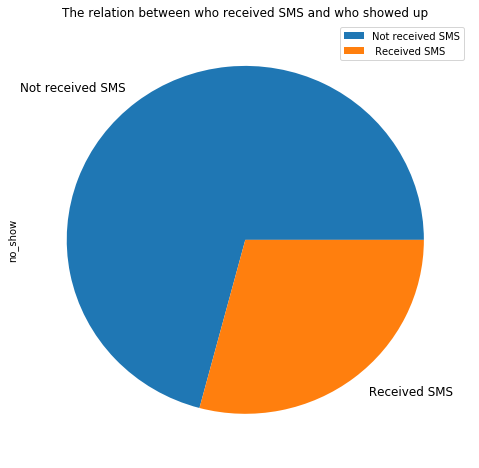

In [20]:
new_df.plot.pie(figsize=(8,8), labels=["Not received SMS"," Received SMS"],fontsize = 12, title="The relation between who received SMS and who showed up");
plt.legend();

#### We noticed that large number of who not receievd SMS they show up their appointments.

### Research Question 4 -  what is the factor from these features (Age,Hypertension,Diabetes, Alcoholic ) that has most effect of people to show up their appointment?

In [21]:
new_df1=df.query('no_show == "No"')
new_df1

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,app_day
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62.0,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56.0,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62.0,MATA DA PRAIA,0,0,0,0,0,0,No,Friday
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29,8.0,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29,56.0,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday
5,95985133231274,5626772,F,2016-04-27 08:36:51,2016-04-29,76.0,REPÚBLICA,0,1,0,0,0,0,No,Friday
8,56394729949972,5638447,F,2016-04-29 08:02:16,2016-04-29,21.0,ANDORINHAS,0,0,0,0,0,0,No,Friday
9,78124564369297,5629123,F,2016-04-27 12:48:25,2016-04-29,19.0,CONQUISTA,0,0,0,0,0,0,No,Friday
10,734536231958495,5630213,F,2016-04-27 14:58:11,2016-04-29,30.0,NOVA PALESTINA,0,0,0,0,0,0,No,Friday
12,566654781423437,5634718,F,2016-04-28 11:33:51,2016-04-29,22.0,NOVA PALESTINA,1,0,0,0,0,0,No,Friday


In [22]:
#Average of patients who didn't miss their appointment
new_df1.age.mean()

37.790496200732491

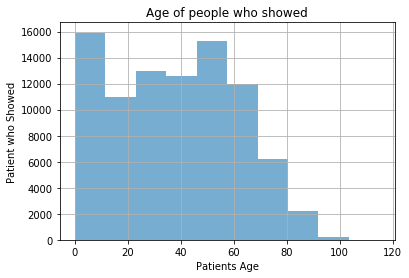

In [23]:
#visualize patients ages who showed up.
new_df1.age.hist(alpha=0.6,bins=10);
plt.xlabel("Patients Age")
plt.ylabel("Patient who Showed")
plt.title("Age of people who showed")
plt.legend()

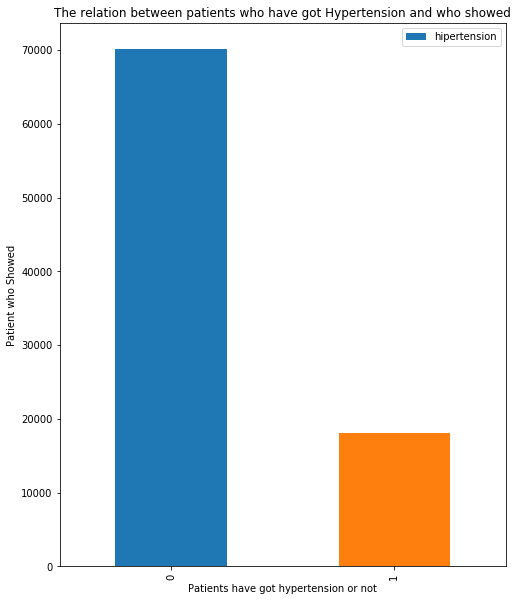

In [96]:
#visualize patients who showed up and .
counts_hyp=new_df1.hipertension.value_counts()
counts_hyp.plot(kind="bar",figsize=(8,10));
plt.xlabel("Patients have got hypertension or not")
plt.ylabel("Patient who Showed")
plt.title("The relation between patients who have got Hypertension and who showed")
plt.legend()

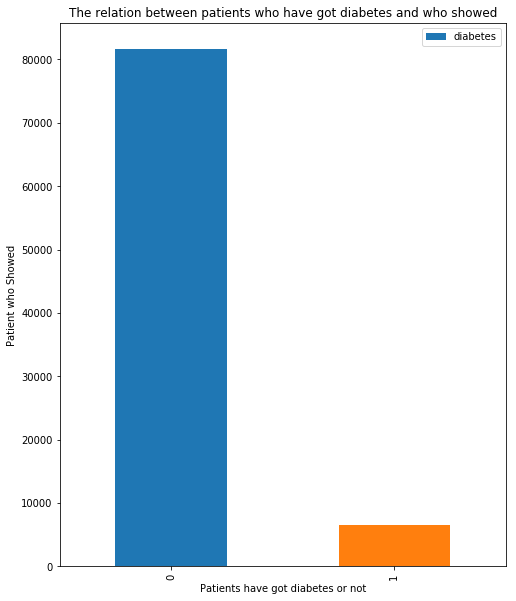

In [95]:
#visualize patients who showed up and .
counts_dia=new_df1.diabetes.value_counts()

counts_dia.plot(kind="bar",figsize=(8,10));
plt.xlabel("Patients have got diabetes or not")
plt.ylabel("Patient who Showed")
plt.title("The relation between patients who have got diabetes and who showed")
plt.legend()

0    85525
1     2683
Name: alcoholism, dtype: int64


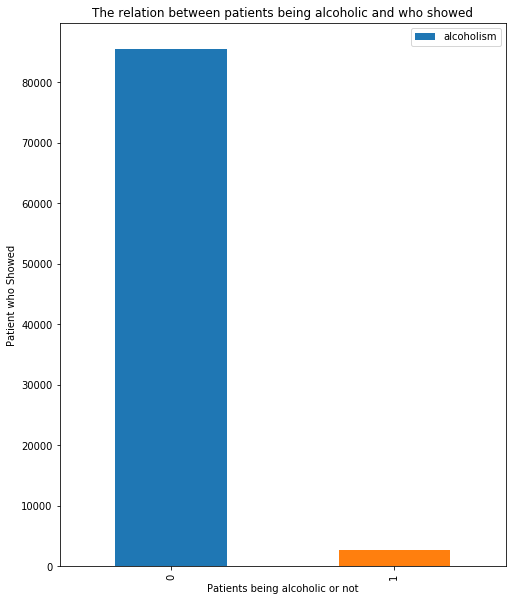

In [94]:
#visualize patients who showed up and .
counts_alch=new_df1.alcoholism.value_counts()
print(counts_alch)
counts_alch.plot(kind="bar",figsize=(8,10));
plt.xlabel("Patients being alcoholic or not")
plt.ylabel("Patient who Showed")
plt.title("The relation between patients being alcoholic and who showed")
plt.legend()

<a id='conclusions'></a>
## Conclusions

#### limitations:
The dataset has some columns that their value caused a difficulty in applying statistical approach like a handicap column has a four values that must be categorized and devided to 4 columns  and also it has some outliers in age columns that must clean it to deal with data in effecient way. In addition, the dataset need more attributes that matter more in showed appointment like traffic attribure.
#### Findings:
> **1-** The Women in Brazil are more cared about their health compared to men who missed their appointments.

> **2-** The appointments have been schedualed on working days are more likely to be missed. Because maybe they are busy with work.

> **3-** SMS message feature has not effect on making the patient to show up their appointment

> **4-** large number of patients who showed are children.

> **5-** large number of patients who come to their appointments are not alcholoics.

> **6-** large number of patients who come to their appointments do not have a hypertension diagnosed.

> **7-** There is no relationship between patients who have health diagnoses and who showed t.

In [97]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0